In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Part 1: Data understanding

In [2]:
df = pd.read_csv('house-price-train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

### 1.1. Classify continuous and categorical features

First we identify continuous and categorical features based on their dtypes in the data. However, some categorical features may appear in numerical values. After looking at the data_description.txt file we spotted that `MSSubClass` was a categorical feature that has numerical values, but we'll classify it as categorical.

In addition, we also remove `Id` because it does not contain any information of the house.

In [3]:
# Identify continuous and categorical features
continuous_features = df.select_dtypes(include=[np.number]).columns.tolist()
continuous_features.remove('MSSubClass')
continuous_features.remove('Id')
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features.append('MSSubClass')

In [4]:
# Define a function to calculate the missing percentage
def missing_percentage(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    return pd.concat([total, percent], axis=1, keys=['Count', 'Percent'])

### 1.2. Data quality report table for continuous features

In [5]:
cont_stats = df[continuous_features].describe().transpose()
cont_miss = missing_percentage(df[continuous_features])
cont_stats.head(3)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0


In [6]:
cont_miss.head(3)

,Count,Percent
LotFrontage,259,17.739726
LotArea,0,0.000000
OverallQual,0,0.000000


In [7]:
cont_stats = cont_stats.join(cont_miss['Percent'])
cont_stats['Card.'] = df[continuous_features].apply(lambda x: x.nunique())

# Correct the column names for the continuous features table
cont_stats.reset_index(inplace=True)
cont_stats.rename(columns={
    'index': 'Feature', 
    '25%': '1st Qrt.', 
    '50%': 'Median', 
    '75%': '3rd Qrt.', 
    'std': 'Std. Dev.', 
    'Percent': 'Miss.'
}, inplace=True)

# Reformat the table for the final output
cont_table = cont_stats[
    ['Feature', 'count', 'Miss.', 'Card.', 'min', '1st Qrt.', 'mean', 'Median', '3rd Qrt.', 'max', 'Std. Dev.']
].copy()
cont_table.rename(columns={
    'count': 'Count', 
    'min': 'Min.', 
    'mean': 'Mean', 
    'max': 'Max.'
}, inplace=True)
cont_table

,Feature,Count,Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,LotFrontage,1201.0,17.739726,110,21.0,59.00,70.049958,69.0,80.00,313.0,24.284752
1,LotArea,1460.0,0.000000,1073,1300.0,7553.50,10516.828082,9478.5,11601.50,215245.0,9981.264932
2,OverallQual,1460.0,0.000000,10,1.0,5.00,6.099315,6.0,7.00,10.0,1.382997
3,OverallCond,1460.0,0.000000,9,1.0,5.00,5.575342,5.0,6.00,9.0,1.112799
4,YearBuilt,1460.0,0.000000,112,1872.0,1954.00,1971.267808,1973.0,2000.00,2010.0,30.202904
5,YearRemodAdd,1460.0,0.000000,61,1950.0,1967.00,1984.865753,1994.0,2004.00,2010.0,20.645407
6,MasVnrArea,1452.0,0.547945,327,0.0,0.00,103.685262,0.0,166.00,1600.0,181.066207
7,BsmtFinSF1,1460.0,0.000000,637,0.0,0.00,443.639726,383.5,712.25,5644.0,456.098091
8,BsmtFinSF2,1460.0,0.000000,144,0.0,0.00,46.549315,0.0,0.00,1474.0,161.319273
9,BsmtUnfSF,1460.0,0.000000,780,0.0,223.00,567.240411,477.5,808.00,2336.0,441.866955


In [8]:
# build into a function so we can reuse it later
def cont_summary(data):
    cont_stats = data.describe().transpose()
    cont_miss = missing_percentage(data)
    cont_stats = cont_stats.join(cont_miss['Percent'])
    cont_stats['Card.'] = data.apply(lambda x: x.nunique())
    cont_stats.reset_index(inplace=True)
    cont_stats.rename(columns={
        'index': 'Feature', 
        '25%': '1st Qrt.', 
        '50%': 'Median', 
        '75%': '3rd Qrt.', 
        'std': 'Std. Dev.', 
        'Percent': 'Miss.'
    }, inplace=True)
    cont_table = cont_stats[
        ['Feature', 'count', 'Miss.', 'Card.', 'min', '1st Qrt.', 'mean', 'Median', '3rd Qrt.', 'max', 'Std. Dev.']
    ].copy()
    cont_table.rename(columns={
        'count': 'Count', 
        'min': 'Min.', 
        'mean': 'Mean', 
        'max': 'Max.'
    }, inplace=True)
    return cont_table

### 1.3. Data quality report table for categorical features

In [9]:
# Recalculate statistics for categorical features
cat_stats = df[categorical_features].describe(include=['O']).transpose()
cat_miss = missing_percentage(df[categorical_features])
cat_stats.head(3)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50


In [10]:
cat_miss.head(3)

,Count,Percent
MSZoning,0,0.000000
Street,0,0.000000
Alley,1369,93.767123


In [11]:
cat_stats = cat_stats.join(cat_miss['Percent'])
cat_stats['Mode %'] = cat_stats['freq'] / cat_stats['count'] * 100
cat_stats['Card.'] = df[categorical_features].apply(lambda x: x.nunique())
cat_stats['2nd Mode'] = df[categorical_features].apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else np.nan)
cat_stats['2nd Mode Freq.'] = df[categorical_features].apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else np.nan)
cat_stats['2nd Mode %'] = cat_stats['2nd Mode Freq.'] / cat_stats['count'] * 100

# Correct the column names for the categorical features table
cat_stats.reset_index(inplace=True)
cat_stats.rename(columns={
    'index': 'Feature', 
    'top': 'Mode', 
    'freq': 'Mode Freq.', 
    'Percent': 'Miss.'
}, inplace=True)

# Reformat the table for the final output
cat_table = cat_stats[
    ['Feature', 'count', 'Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']
].copy()
cat_table.rename(columns={'count': 'Count'}, inplace=True)
cat_table

,Feature,Count,Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,MSZoning,1460,0.000000,5,RL,1151,78.835616,RM,218,14.931507
1,Street,1460,0.000000,2,Pave,1454,99.589041,Grvl,6,0.410959
2,Alley,91,93.767123,2,Grvl,50,54.945055,Pave,41,45.054945
3,LotShape,1460,0.000000,4,Reg,925,63.356164,IR1,484,33.150685
4,LandContour,1460,0.000000,4,Lvl,1311,89.794521,Bnk,63,4.315068
5,Utilities,1460,0.000000,2,AllPub,1459,99.931507,NoSeWa,1,0.068493
6,LotConfig,1460,0.000000,5,Inside,1052,72.054795,Corner,263,18.013699
7,LandSlope,1460,0.000000,3,Gtl,1382,94.657534,Mod,65,4.452055
8,Neighborhood,1460,0.000000,25,NAmes,225,15.410959,CollgCr,150,10.273973
9,Condition1,1460,0.000000,9,Norm,1260,86.30137,Feedr,81,5.547945


In [12]:
# build into a function so we can reuse it later
def cat_summary(data):
    cat_stats = data.describe(include=['O']).transpose()
    cat_miss = missing_percentage(data)
    cat_stats = cat_stats.join(cat_miss['Percent'])
    cat_stats['Mode %'] = cat_stats['freq'] / cat_stats['count'] * 100
    cat_stats['Card.'] = data.apply(lambda x: x.nunique())
    cat_stats['2nd Mode'] = data.apply(lambda x: x.value_counts().index[1] if len(x.value_counts()) > 1 else np.nan)
    cat_stats['2nd Mode Freq.'] = data.apply(lambda x: x.value_counts().iloc[1] if len(x.value_counts()) > 1 else np.nan)
    cat_stats['2nd Mode %'] = cat_stats['2nd Mode Freq.'] / cat_stats['count'] * 100
    cat_stats.reset_index(inplace=True)
    cat_stats.rename(columns={
        'index': 'Feature', 
        'top': 'Mode', 
        'freq': 'Mode Freq.', 
        'Percent': 'Miss.'
    }, inplace=True)
    cat_table = cat_stats[
        ['Feature', 'count', 'Miss.', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %']
    ].copy()
    cat_table.rename(columns={'count': 'Count'}, inplace=True)
    return cat_table

### 1.4. Visualizations of distributions of key variables

Since there are too many variables, it's impractical to visualize all of them. Instead, we will only visualize some key features that will likely affect the saleprice. We pick features to visualize based on the following criteria:

1. Relevance to the Objective: Features that are likely highly relevant to predicting house prices, which we can pick based on domain knowledge. For instance, square footage, overall quality, year built, and number of rooms are typically good predictors of house prices.
2. High Variance: Features with higher variance are more likely to have an impact on the target variable than features with low variance. However, it's important to normalize all features to the same range before comparing their variance.
3. Few missing values: If a feature has too many missing values, it might not provide enough information or could introduce bias.

#### 1.4.1. Visualizations of Continuous Features

Based on domain knowledge, continuous features like `OverallQual`, `GrLivArea`, `TotalBsmtSF`, `GarageCars`, `GarageArea`, and `YearBuilt` are highly predictive of the house price. Therefore we first visualize these features using histogram.

In [13]:
# the function can be used for visualizing any set of features.
def plot_histograms(dataframe, feature_stats, features_list, rows, cols, figsize=(15, 15)):
    # dataframe: data
    # feature_stats: feature summary table
    # features_list: list of features to plot
    # rows, cols: number of rows and columns in the plot grid
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, feature in enumerate(features_list):
        if i < len(axes):
            # bins = cardinality if the cardinality is less than 30, otherwise bins = 30
            # retrieve the cardinality from the feature_stats table
            cardinality = feature_stats.loc[feature_stats['Feature'] == feature, 'Card.'].values[0]
            bins = cardinality if cardinality < 30 else 30
            sns.histplot(dataframe[feature], bins=bins, kde=False, ax=axes[i], stat="density")
            axes[i].set_title(f'Histogram of {feature}', fontsize=10)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Density')
            axes[i].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability
        else:
            break  # Break the loop if we have more axes than features

    # Remove the empty subplots if the features to visualize are less than the number of subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

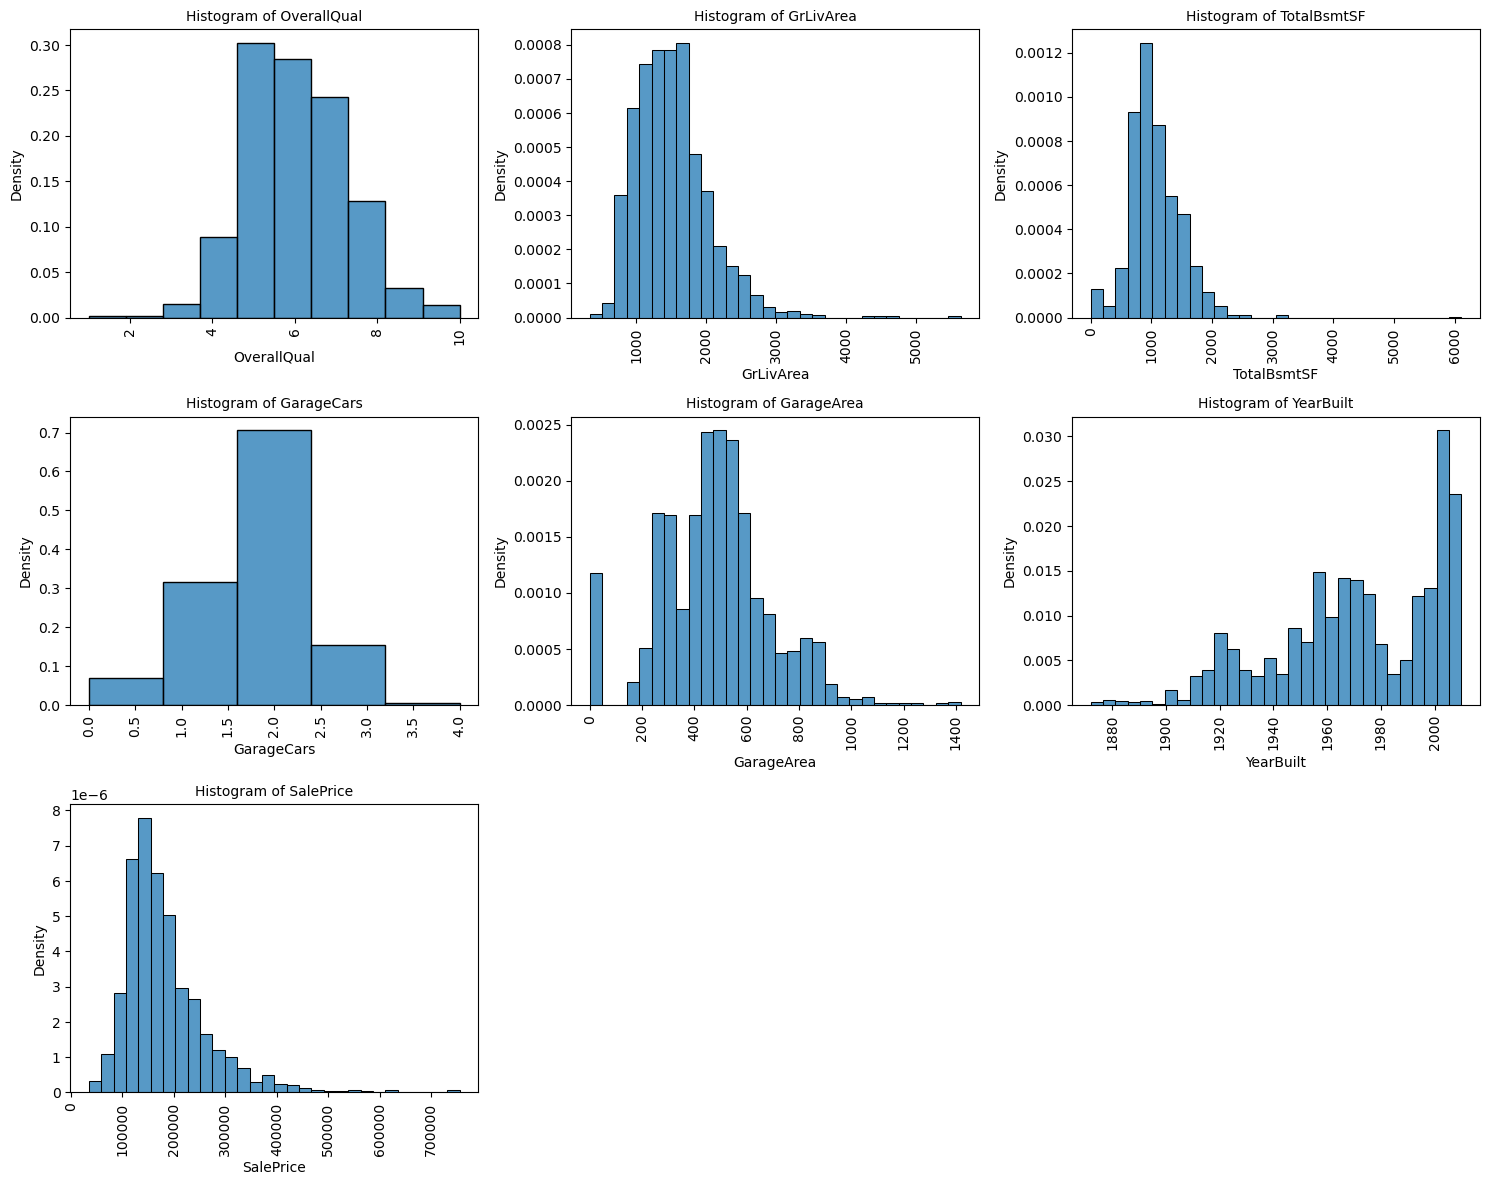

In [14]:
features_to_visualize = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'SalePrice']
plot_histograms(df, cont_table, features_to_visualize, rows=4, cols=3)

We can see from these plots that many features are single modal. Most of them follow a Normal distribution, but some features such as GrLiveArea and the target feature SalePrice are right skewed, which is expected for a domain like real estate. On other other hand, YearBuilt is multimodal where most houses seem to be built around the 1920s, 1970s, and 2010s.

The following continuous features may also be important in predicting house price, and can be visualized using the same implemented function. We do not visualize them here for simplicity.
- 1stFlrSF: First Floor square feet.
- FullBath: Full bathrooms above grade.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms).
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions).
- MasVnrArea: Masonry veneer area in square feet.
- LotFrontage: Linear feet of street connected to the property.
- LotArea: Lot size in square feet.
- BsmtFinSF1: Type 1 finished square feet.
- OpenPorchSF: Open porch area in square feet.

#### 1.4.2. Visualizations of Categorical Features

Based on domain knowledge, `Neighborhood`, `MSZoning`, `SaleCondition`, `Exterior1st`, `Exterior2nd`, `KitchenQual`, `HeatingQC` are categorical features that are important for predicting the price. We first visualize these features.

In [15]:
def plot_bar_plots(dataframe, features_list, rows, cols, figsize=(15, 15)):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features_list):
        if i < len(axes):
            sns.countplot(x=feature, data=dataframe, ax=axes[i], stat="probability")
            axes[i].set_title(f'Bar Plot of {feature}', fontsize=10)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Density')
            axes[i].tick_params(axis='x', rotation=90)
        else:
            break

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


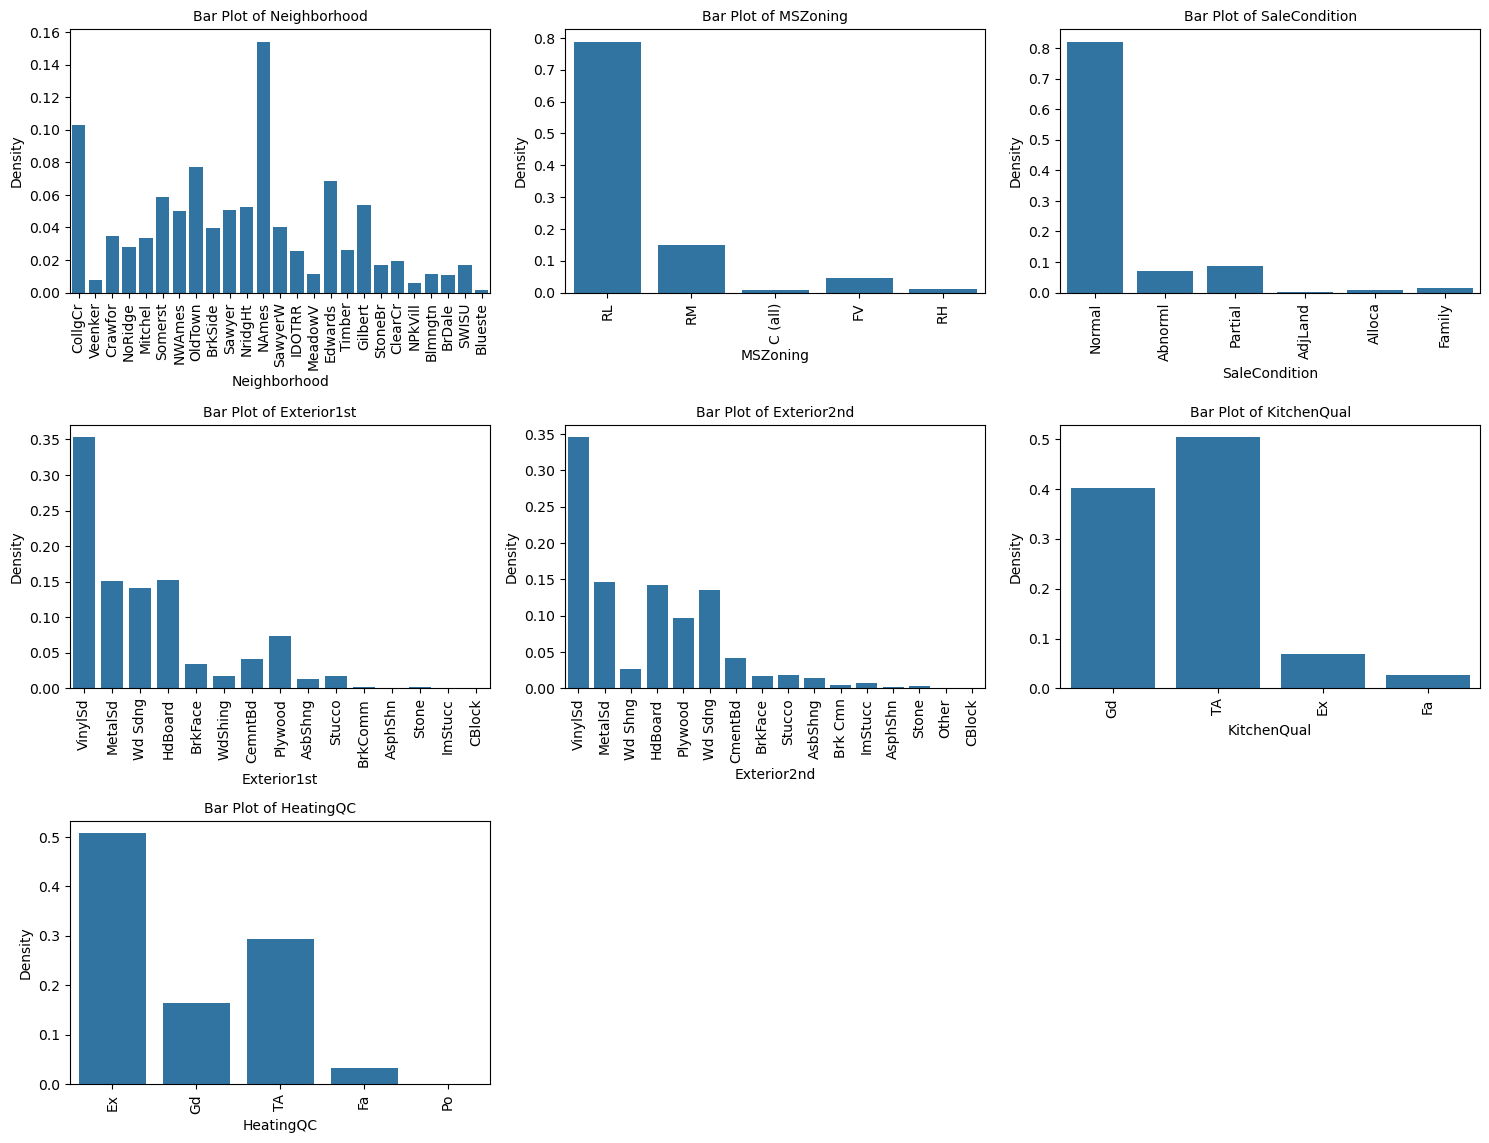

In [16]:
categorical_features_to_visualize = ['Neighborhood', 'MSZoning', 'SaleCondition', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'HeatingQC']
plot_bar_plots(df, categorical_features_to_visualize, rows=4, cols=3)

From the plots, we can see that in features like MSZoning, and quality-related and condition-related features like SaleCondition, Exterior1st, KitchenQual, the majority of data points fall into the most and second-most common categories. From a domain perspective, this is expected since most houses are in either good, typical, or normal conditions. On the other hand, Neigherhood seems more uniform across categories.

The following categorical features may also be important in predicting house price, and can be visualized using the same implemented function. We do not plot them here for simplicity.
- ExterQual: Evaluates the quality of the material on the exterior.
- HeatingQC: Heating quality and condition.
- BsmtQual: Evaluates the height of the basement.
- GarageFinish: Interior finish of the garage.
- Foundation: Type of foundation.
- CentralAir: Indicates whether there is central air conditioning.
- FireplaceQu: Fireplace quality.
- SaleType: Type of sale.
- RoofStyle: Type of roof.

#### 1.4.3. Calculate the variance of normalized features to estimate the importance of each feature

For continuous features, we first have to normalize each feature to [0, 1] range to have a fair comparison between features.

In [17]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numeric_features = df.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(['MSSubClass', 'Id'], axis=1)

scaler = MinMaxScaler()
# Fit the scaler to the data to transform each feature to [0, 1]
scaled_numeric_features = scaler.fit_transform(numeric_features)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features.columns)

# Calculate the variance of the scaled features
numeric_variances = scaled_df.var().sort_values(ascending=False)

numeric_variances

YearRemodAdd     0.118398
YrSold           0.110240
HalfBath         0.063223
MoSold           0.060410
GarageYrBlt      0.050379
YearBuilt        0.047900
Fireplaces       0.046177
2ndFlrSF         0.044687
BsmtUnfSF        0.035780
GarageCars       0.034905
FullBath         0.033723
BsmtFullBath     0.029919
OverallQual      0.023613
GarageArea       0.022734
WoodDeckSF       0.021390
OverallCond      0.019349
TotRmsAbvGrd     0.018347
OpenPorchSF      0.014672
BsmtHalfBath     0.014251
ScreenPorch      0.013493
MasVnrArea       0.012807
EnclosedPorch    0.012260
SalePrice        0.012171
BsmtFinSF2       0.011978
BedroomAbvGr     0.010398
GrLivArea        0.009801
1stFlrSF         0.007869
LowQualFinSF     0.007226
LotFrontage      0.006917
BsmtFinSF1       0.006530
KitchenAbvGr     0.005394
TotalBsmtSF      0.005155
3SsnPorch        0.003331
PoolArea         0.002964
LotArea          0.002177
MiscVal          0.001025
dtype: float64

One can base on this ranking to pick features for visualization when they are unsure about the domain.

For categorical features, we cannot calculate the variance since they are not numerical values. We can instead compute the entropy of each feature as a notion of feature variation across the data.

In [18]:
from scipy.stats import entropy

def calculate_entropy(dataframe, feature):
    # Count the frequency of each category in the feature
    value_counts = dataframe[feature].value_counts()
    
    # Calculate the probabilities for each category
    probabilities = value_counts / len(dataframe)
    
    # Calculate and return the entropy
    return entropy(probabilities)

# Calculate entropy for each categorical feature
entropies = {feature: calculate_entropy(df, feature) for feature in categorical_features}

# Convert the entropies dictionary to a sorted DataFrame for better visualization
entropies_df = pd.DataFrame(list(entropies.items()), columns=['Feature', 'Entropy']).sort_values(by='Entropy', ascending=False)
entropies_df


,Feature,Entropy
8,Neighborhood,2.907265
43,MSSubClass,2.024946
16,Exterior2nd,1.950668
15,Exterior1st,1.889490
24,BsmtFinType1,1.620774
12,HouseStyle,1.288388
27,HeatingQC,1.120186
39,Fence,1.096763
38,PoolQC,1.078992
34,GarageFinish,1.072367


Similar to continuous features, one can base on this ranking to pick features for visualization when they are unsure about the domain.

## Part 2: Identify and Handle Data Issues

After having a good understanding of the data, we will handle issues existing in the data related to Missing Values, Irregular Cardinality, and Outliers.

### 2.1. Identify and Handle Missing Values

#### 2.1.1. Continuous Features

In [19]:
cont_table[cont_table['Miss.'] > 0]

,Feature,Count,Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,LotFrontage,1201.0,17.739726,110,21.0,59.0,70.049958,69.0,80.0,313.0,24.284752
6,MasVnrArea,1452.0,0.547945,327,0.0,0.0,103.685262,0.0,166.0,1600.0,181.066207
23,GarageYrBlt,1379.0,5.547945,97,1900.0,1961.0,1978.506164,1980.0,2002.0,2010.0,24.689725


All continuous features have low to moderate percentages of missing values, so we do not remove any feature. We then visualize the histogram of features with missing values > 0.

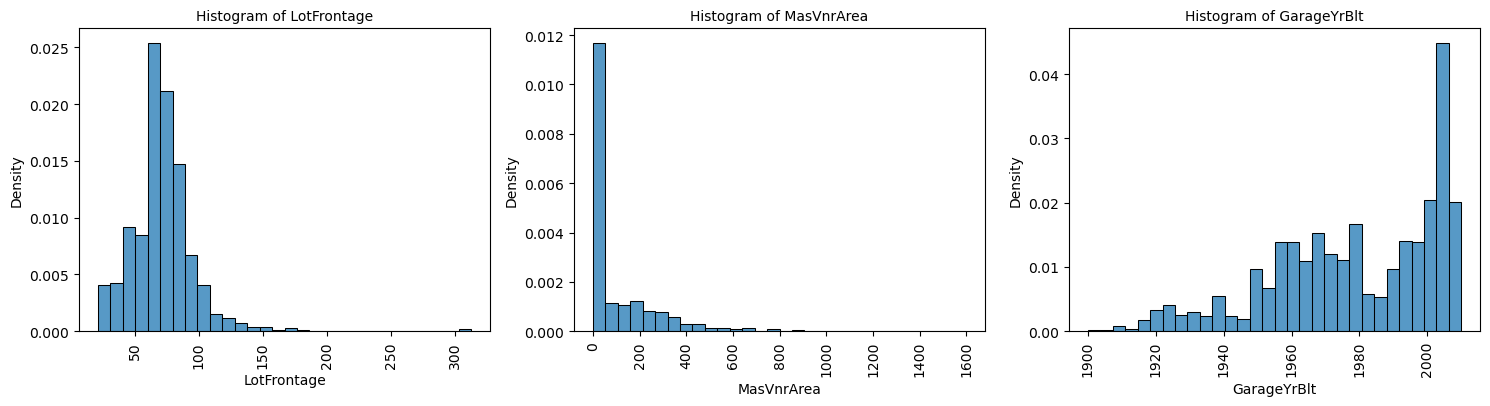

In [20]:
plot_histograms(df, cont_table, cont_table[cont_table['Miss.'] > 0]['Feature'].tolist(), rows=4, cols=3)

- For LotFrontage, the distribution is right-skewed, so we impute the missing values with the median value.
- For MasVnArea, the distribution is highly skewed, with a large peak at zero and a long tail to the right. Therefore, we use 0 to impute missing values, since the zero value has a meaningful interpretation (no masonry veneer for a house), and the median for this feature is also 0.

In [21]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

Verify that there is no missing value for LotFrontage and MasVnrArea

In [22]:
# Verify that there is no missing value for LotFrontage and MasVnrArea
df[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

For GarageYrBlt, we check if missing values are due to the property having no garage.

In [23]:
df[df['GarageYrBlt'].isnull()].filter(regex='Garage').head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


The result clearly shows that the missing values in GarageYrBlt are indeed due to the property having no garage. Therefore, we impute missing values of GarageYrBlt with a `placeholder` value of 0, since it helps separate the houses with a garage and the houses without, and at the same time allows us to keep the GarageYrBlt column

In [24]:
# impute missing values of GarageYrBlt with a `placeholder` value of 0
df['GarageYrBlt'].fillna(0, inplace=True)

Verify that there is no missing value for LotFrontage and MasVnrArea

In [25]:
df['GarageYrBlt'].isnull().sum()

0

#### 2.1.2. Categorical Features

In [26]:
cat_table[cat_table['Miss.'] > 0]

,Feature,Count,Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
2,Alley,91,93.767123,2,Grvl,50,54.945055,Pave,41,45.054945
17,MasVnrType,588,59.726027,3,BrkFace,445,75.680272,Stone,128,21.768707
21,BsmtQual,1423,2.534247,4,TA,649,45.607871,Gd,618,43.429375
22,BsmtCond,1423,2.534247,4,TA,1311,92.129304,Gd,65,4.567814
23,BsmtExposure,1422,2.602740,4,No,953,67.018284,Av,221,15.541491
24,BsmtFinType1,1423,2.534247,6,Unf,430,30.21785,GLQ,418,29.374561
25,BsmtFinType2,1422,2.602740,6,Unf,1256,88.326301,Rec,54,3.797468
29,Electrical,1459,0.068493,5,SBrkr,1334,91.432488,FuseA,94,6.442769
32,FireplaceQu,770,47.260274,5,Gd,380,49.350649,TA,313,40.649351
33,GarageType,1379,5.547945,6,Attchd,870,63.089195,Detchd,387,28.063814


Among the categorical features, `Alley`, `MasVnrType`, `PoolQC`, `Fence`, and `MiscFeature` have a very high percentage of missing values (60% and above). Therefore, we drop these features from the data.

In [27]:
# drop Alley, MasVnrType, PoolQC, Fence, MiscFeature from df and cat_table
dropped_features = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop(dropped_features, axis=1)
cat_table = cat_table[~cat_table['Feature'].isin(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'])]
categorical_features = [feature for feature in categorical_features if feature not in dropped_features]

In [28]:
cat_table[cat_table['Miss.'] > 0]

,Feature,Count,Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
21,BsmtQual,1423,2.534247,4,TA,649,45.607871,Gd,618,43.429375
22,BsmtCond,1423,2.534247,4,TA,1311,92.129304,Gd,65,4.567814
23,BsmtExposure,1422,2.602740,4,No,953,67.018284,Av,221,15.541491
24,BsmtFinType1,1423,2.534247,6,Unf,430,30.21785,GLQ,418,29.374561
25,BsmtFinType2,1422,2.602740,6,Unf,1256,88.326301,Rec,54,3.797468
29,Electrical,1459,0.068493,5,SBrkr,1334,91.432488,FuseA,94,6.442769
32,FireplaceQu,770,47.260274,5,Gd,380,49.350649,TA,313,40.649351
33,GarageType,1379,5.547945,6,Attchd,870,63.089195,Detchd,387,28.063814
34,GarageFinish,1379,5.547945,3,Unf,605,43.872371,RFn,422,30.601885
35,GarageQual,1379,5.547945,5,TA,1311,95.068891,Fa,48,3.480783


We have verified above the the missing values of Garage-related columns are due to the property having no garage. Thefore, we impute these features with a special `placeholder` value `No Garage`, since it helps separate the houses with a garage and the ones without, and allows us to keep the features

In [29]:
# impute GarageType, GarageFinish, GarageQual, GarageCond with a `placeholder` value of 'No Garage'
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)

In [30]:
df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

For features related to Basement, we suspect that the missing values are due to the properties having no basement.

In [31]:
df[df['BsmtQual'].isnull()].filter(regex='Bsmt')

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


It is confirmed that whenever BsmtQual is NaN there is no basement, and other Basement-related features above are also missing. Therefore, we impute all Basement-related features above with `No Basement`.

In [32]:
# impute Basement-related features above with `No Basement`
df['BsmtQual'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)

Verify there is no missing value for these features

In [33]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

The two remaining features that have missing values are Electrical and FireplaceQu. We plot bar plots of these features to understand them better.

In [34]:
# show cat_table for Electrical and FireplaceQu
cat_table[cat_table['Feature'].isin(['Electrical', 'FireplaceQu'])]

,Feature,Count,Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
29,Electrical,1459,0.068493,5,SBrkr,1334,91.432488,FuseA,94,6.442769
32,FireplaceQu,770,47.260274,5,Gd,380,49.350649,TA,313,40.649351


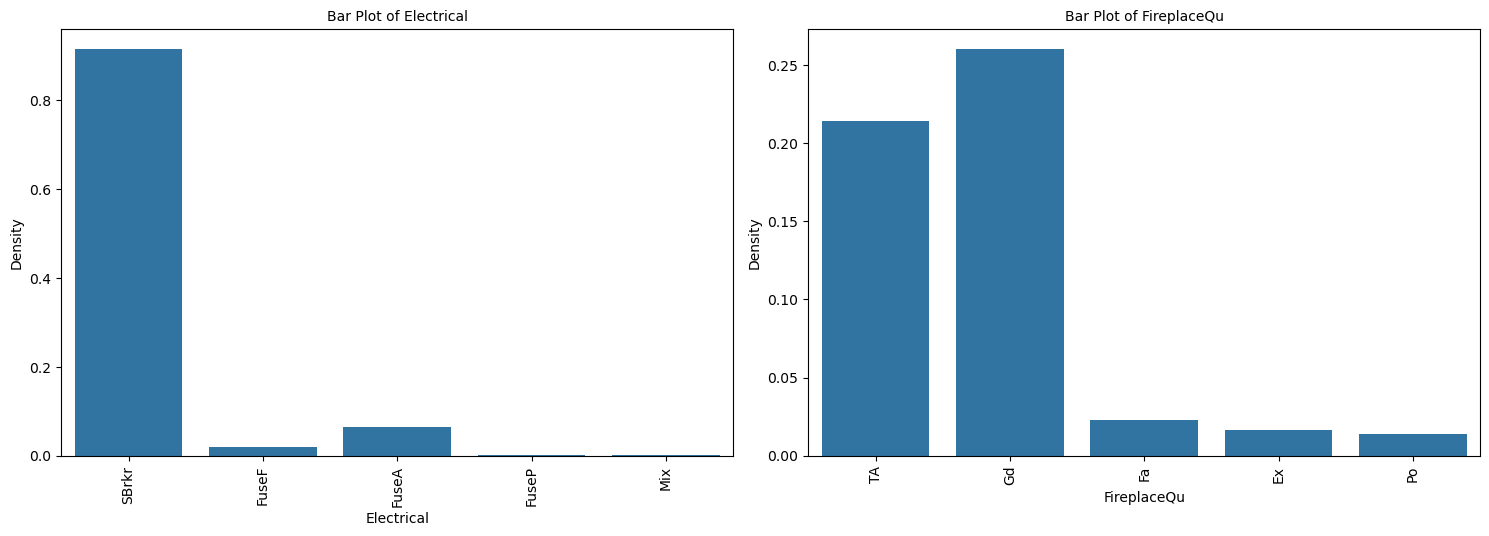

In [35]:
plot_bar_plots(df, ['Electrical', 'FireplaceQu'], rows=3, cols=2)

For Electrical, we impute missing values with `SBrkr` which is the mode since it dominates other values. For FireplaceQu, there is the `NA` category that is not used in the data, so we suspect the the missing values of this feature might have been `NA`. Therefore, we impute missing values of FireplaceQu with `NA`.

In [36]:
df['Electrical'].fillna('SBrkr', inplace=True)
df['FireplaceQu'].fillna('NA', inplace=True)

Verify that there is no missing value for these two features

In [37]:
df[['Electrical', 'FireplaceQu']].isnull().sum()

Electrical     0
FireplaceQu    0
dtype: int64

Verify that there is no missing value left in the data

In [38]:
df.isnull().sum().sum()

0

### 2.2. Identify and Handle Irregular Cardinality

We first investigate the Cardinality column of the data quality report table for continuous features. There is no feature with a cardinality of 1. However, the following features have very low cardinality compared to the count:
- OverallQual
- OverallCond
- LowQualFinSF
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- 3SsnPorch
- PoolArea
- MiscVal
- MoSold
- YrSold

To verify whether these are categorical features that have been wrongly classified as continuous features, we look at the data description. After reading the data description, we confirm that all these features are indeed continuous features, as there is a specific order between different values. They have low cardinality because they correspond to certain features of the house that are integers and have a small range of values, e.g., number of bed rooms and kitchens. Therefore, there is no problem with these features and we keep them intact.

In [39]:
cont_summary(df[continuous_features])

,Feature,Count,Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,LotFrontage,1460.0,0.0,110,21.0,60.00,69.863699,69.0,79.00,313.0,22.027677
1,LotArea,1460.0,0.0,1073,1300.0,7553.50,10516.828082,9478.5,11601.50,215245.0,9981.264932
2,OverallQual,1460.0,0.0,10,1.0,5.00,6.099315,6.0,7.00,10.0,1.382997
3,OverallCond,1460.0,0.0,9,1.0,5.00,5.575342,5.0,6.00,9.0,1.112799
4,YearBuilt,1460.0,0.0,112,1872.0,1954.00,1971.267808,1973.0,2000.00,2010.0,30.202904
5,YearRemodAdd,1460.0,0.0,61,1950.0,1967.00,1984.865753,1994.0,2004.00,2010.0,20.645407
6,MasVnrArea,1460.0,0.0,327,0.0,0.00,103.117123,0.0,164.25,1600.0,180.731373
7,BsmtFinSF1,1460.0,0.0,637,0.0,0.00,443.639726,383.5,712.25,5644.0,456.098091
8,BsmtFinSF2,1460.0,0.0,144,0.0,0.00,46.549315,0.0,0.00,1474.0,161.319273
9,BsmtUnfSF,1460.0,0.0,780,0.0,223.00,567.240411,477.5,808.00,2336.0,441.866955


We then investigate the cardinality of categorical features. It is easy to show that all categorical features have a reasonable cardinality, and we thus keep them intact.

In [40]:
cat_summary(df[categorical_features])

,Feature,Count,Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,MSZoning,1460,0.0,5,RL,1151,78.835616,RM,218,14.931507
1,Street,1460,0.0,2,Pave,1454,99.589041,Grvl,6,0.410959
2,LotShape,1460,0.0,4,Reg,925,63.356164,IR1,484,33.150685
3,LandContour,1460,0.0,4,Lvl,1311,89.794521,Bnk,63,4.315068
4,Utilities,1460,0.0,2,AllPub,1459,99.931507,NoSeWa,1,0.068493
5,LotConfig,1460,0.0,5,Inside,1052,72.054795,Corner,263,18.013699
6,LandSlope,1460,0.0,3,Gtl,1382,94.657534,Mod,65,4.452055
7,Neighborhood,1460,0.0,25,NAmes,225,15.410959,CollgCr,150,10.273973
8,Condition1,1460,0.0,9,Norm,1260,86.30137,Feedr,81,5.547945
9,Condition2,1460,0.0,8,Norm,1445,98.972603,Feedr,6,0.410959


### 2.3. Identity and Handle Outliers

We first show the data quality report table for continuous features

In [41]:
cont_summary(df[continuous_features])

,Feature,Count,Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,LotFrontage,1460.0,0.0,110,21.0,60.00,69.863699,69.0,79.00,313.0,22.027677
1,LotArea,1460.0,0.0,1073,1300.0,7553.50,10516.828082,9478.5,11601.50,215245.0,9981.264932
2,OverallQual,1460.0,0.0,10,1.0,5.00,6.099315,6.0,7.00,10.0,1.382997
3,OverallCond,1460.0,0.0,9,1.0,5.00,5.575342,5.0,6.00,9.0,1.112799
4,YearBuilt,1460.0,0.0,112,1872.0,1954.00,1971.267808,1973.0,2000.00,2010.0,30.202904
5,YearRemodAdd,1460.0,0.0,61,1950.0,1967.00,1984.865753,1994.0,2004.00,2010.0,20.645407
6,MasVnrArea,1460.0,0.0,327,0.0,0.00,103.117123,0.0,164.25,1600.0,180.731373
7,BsmtFinSF1,1460.0,0.0,637,0.0,0.00,443.639726,383.5,712.25,5644.0,456.098091
8,BsmtFinSF2,1460.0,0.0,144,0.0,0.00,46.549315,0.0,0.00,1474.0,161.319273
9,BsmtUnfSF,1460.0,0.0,780,0.0,223.00,567.240411,477.5,808.00,2336.0,441.866955


The min and max values of all features are plausible values. Therefore, it's unlikely that the data has invalid outliers. Next, we examine the gaps between the median, minimum, maximum, 1st quartile, and 3rd quartile values.

In [42]:
cont_table_exam_outliers = cont_summary(df[continuous_features])
cont_table_exam_outliers['Max. - 3rd Qrt.'] = cont_table_exam_outliers['Max.'] - cont_table_exam_outliers['3rd Qrt.']
cont_table_exam_outliers['3rd Qrt. - Median'] = cont_table_exam_outliers['3rd Qrt.'] - cont_table_exam_outliers['Median']
cont_table_exam_outliers['Median - 1st Qrt.'] = cont_table_exam_outliers['Median'] - cont_table_exam_outliers['1st Qrt.']
cont_table_exam_outliers['1st Qrt. - Min.'] = cont_table_exam_outliers['1st Qrt.'] - cont_table_exam_outliers['Min.']
cont_table_exam_outliers.drop(['Count', 'Miss.', 'Card.', 'Min.', '1st Qrt.', 'Mean', 'Median', '3rd Qrt.', 'Max.', 'Std. Dev.'], axis=1)

,Feature,Max. - 3rd Qrt.,3rd Qrt. - Median,Median - 1st Qrt.,1st Qrt. - Min.
0,LotFrontage,234.00,10.00,9.00,39.00
1,LotArea,203643.50,2123.00,1925.00,6253.50
2,OverallQual,3.00,1.00,1.00,4.00
3,OverallCond,3.00,1.00,0.00,4.00
4,YearBuilt,10.00,27.00,19.00,82.00
5,YearRemodAdd,6.00,10.00,27.00,17.00
6,MasVnrArea,1435.75,164.25,0.00,0.00
7,BsmtFinSF1,4931.75,328.75,383.50,0.00
8,BsmtFinSF2,1474.00,0.00,0.00,0.00
9,BsmtUnfSF,1528.00,330.50,254.50,223.00


From the table, we can see that the following features need further examination, where the gaps between `Max. - 3rd Qrt.` and `3rd Qrt. - Median` and/or between `Median - 1st Qrt.` and `1st Qrt. - Min.` are noticeable:
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

We plot the histograms of these features

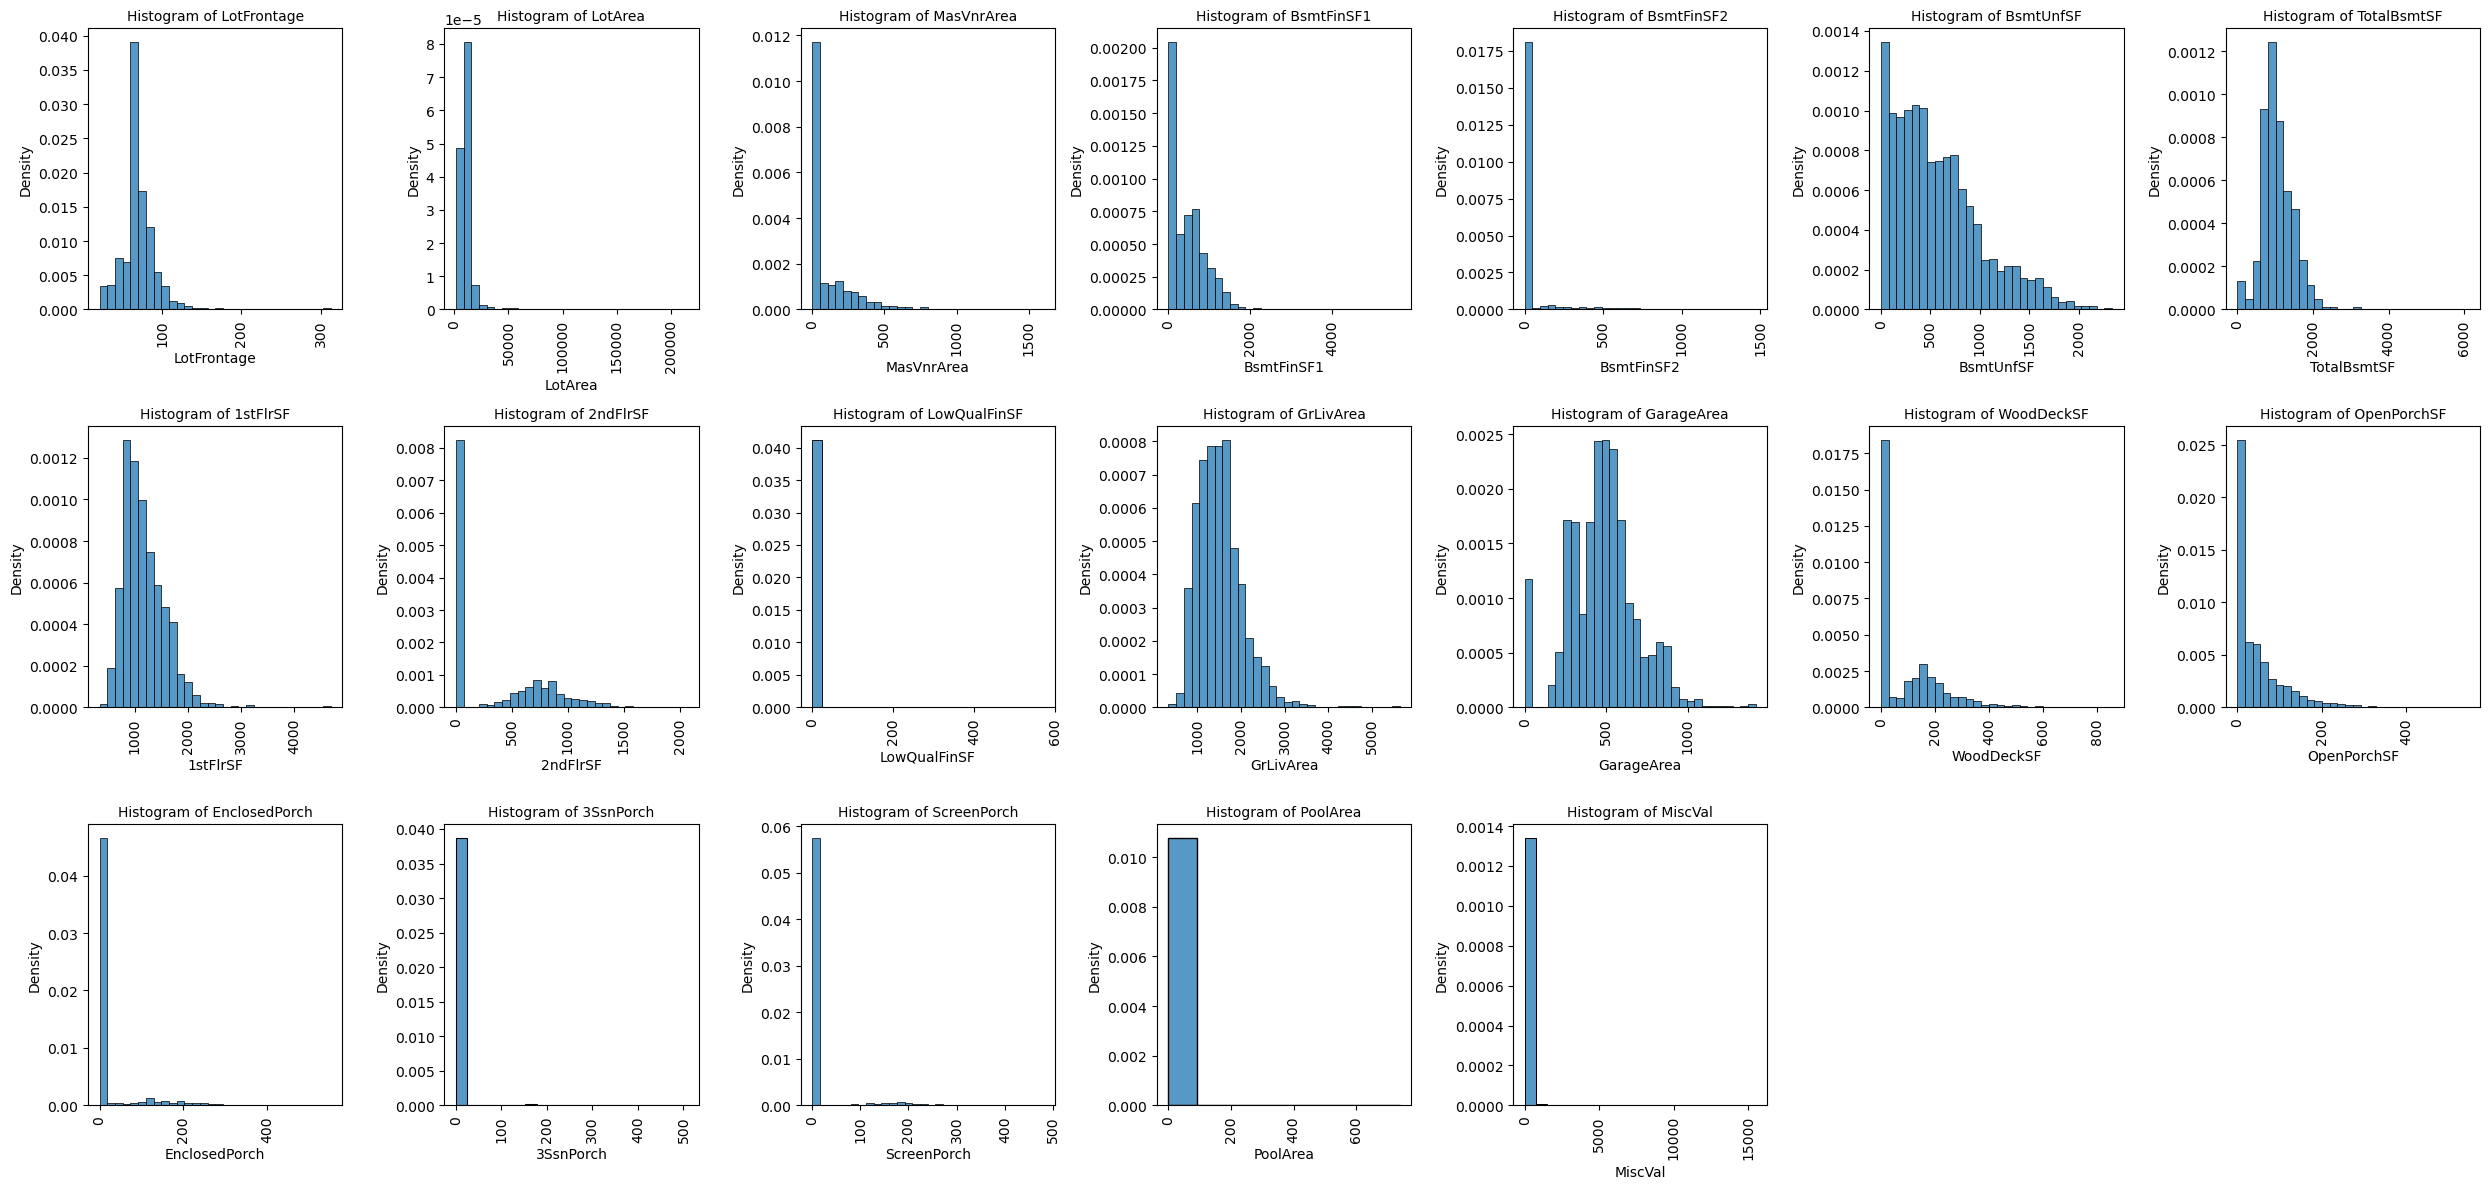

In [43]:
features_to_visualize = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
plot_histograms(df, cont_table, features_to_visualize, rows=3, cols=7, figsize=(25, 12))

First, we can see that `BsmtFinSF2`, `LowQualFinSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal` are mostly zeros, so we create new binary features that simply indicate the presence or absence of these features, and drop the original features.

In [44]:
# BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal are mostly zeros, so we create new binary features that simply indicate the presence or absence of these features
df['HasBsmtFinSF2'] = df['BsmtFinSF2'].apply(lambda x: 1 if x > 0 else 0)
df['HasLowQualFinSF'] = df['LowQualFinSF'].apply(lambda x: 1 if x > 0 else 0)
df['HasEnclosedPorch'] = df['EnclosedPorch'].apply(lambda x: 1 if x > 0 else 0)
df['Has3SsnPorch'] = df['3SsnPorch'].apply(lambda x: 1 if x > 0 else 0)
df['HasScreenPorch'] = df['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
df['HasPoolArea'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasMiscVal'] = df['MiscVal'].apply(lambda x: 1 if x > 0 else 0)

# drop the original features
df.drop(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)
continuous_features = [feature for feature in continuous_features if feature not in ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]
continuous_features.extend(['HasBsmtFinSF2', 'HasLowQualFinSF', 'HasEnclosedPorch', 'Has3SsnPorch', 'HasScreenPorch', 'HasPoolArea', 'HasMiscVal'])

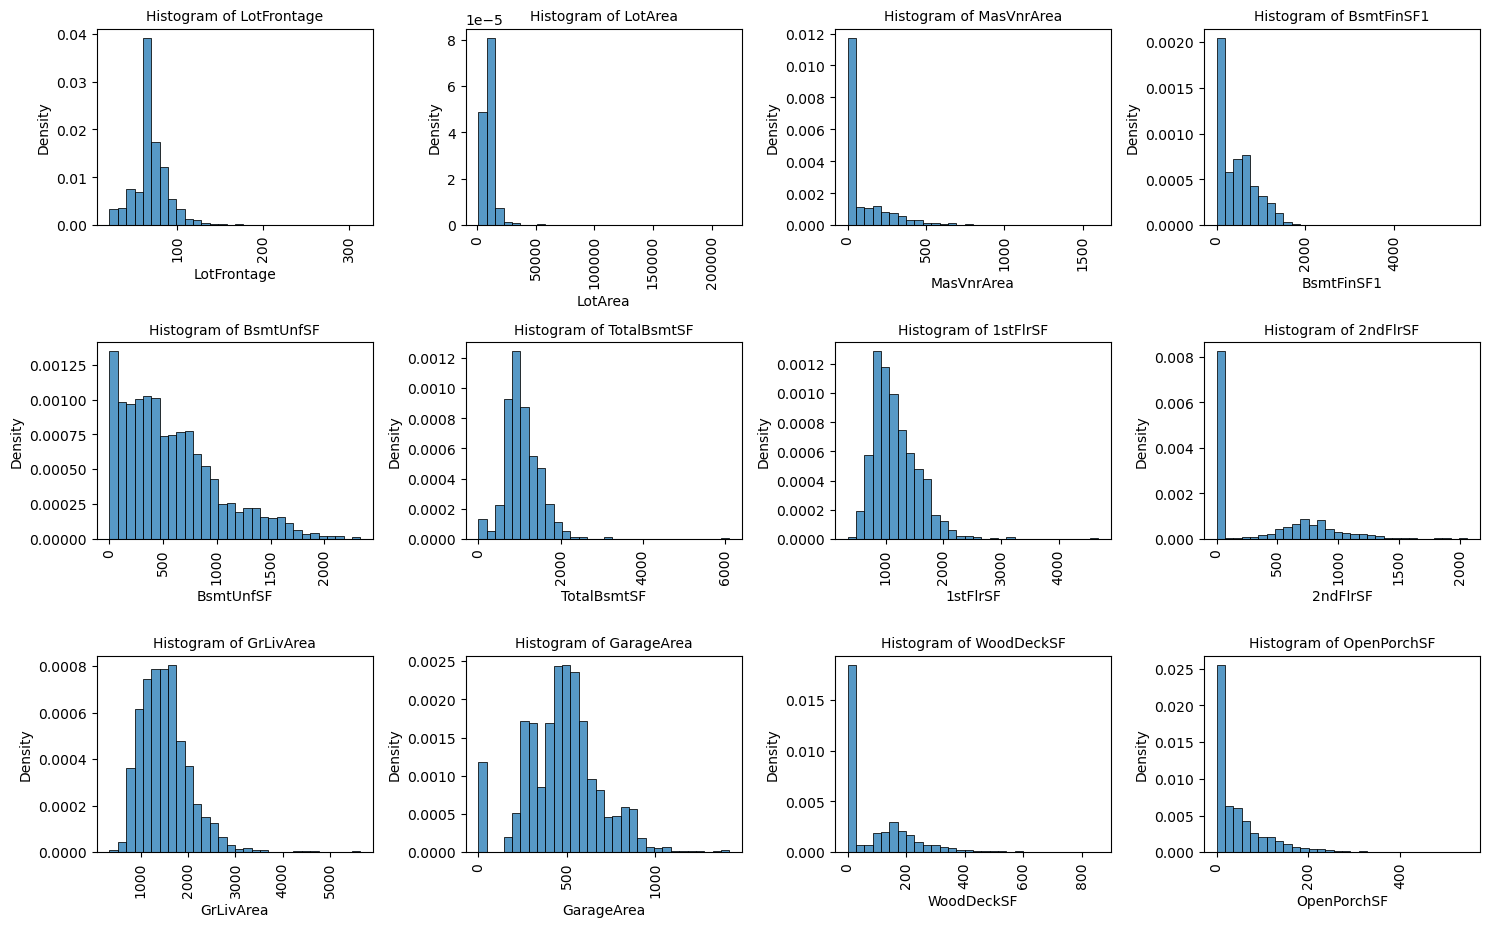

In [45]:
features_to_visualize = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
plot_histograms(df, cont_table, features_to_visualize, rows=5, cols=4)

Given the nature of the features, which are related to property measurements, it's likely that many of the "outliers" are legitimate values that reflect larger or more luxurious houses. Therefore, we should not remove these data points as they could be important for predicting house prices.
We calculate IQR (Interquartile Range) Score, which is the difference between the 75th and 25th percentiles, and identify outliers as those data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. We first determine the percentage of data points that fall out of this range for each feature.

In [46]:
# calculate IQR (Interquartile Range) Score, and identify outliers as those data points that fall outside [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
# We then determine the percentage of data points that fall out of this range for each feature.
def calculate_outlier_percentage(dataframe, feature, alpha=1.5):
    # alpha: the coefficient to control the width of the outlier boundaries
    first_quartile = dataframe[feature].describe()['25%']
    third_quartile = dataframe[feature].describe()['75%']
    
    iqr = third_quartile - first_quartile
    
    lower_limit = first_quartile - alpha * iqr
    upper_limit = third_quartile + alpha * iqr
    
    return len(dataframe[(dataframe[feature] < lower_limit) | (dataframe[feature] > upper_limit)]) / len(dataframe) * 100, lower_limit, upper_limit

In [47]:
features_to_examine = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
outlier_percentages = {feature: calculate_outlier_percentage(df, feature, alpha=1.5)[0] for feature in features_to_examine}
outlier_percentages

{'LotFrontage': 7.260273972602739,
 'LotArea': 4.726027397260274,
 'MasVnrArea': 6.712328767123288,
 'BsmtFinSF1': 0.4794520547945206,
 'BsmtUnfSF': 1.9863013698630139,
 'TotalBsmtSF': 4.178082191780822,
 '1stFlrSF': 1.36986301369863,
 '2ndFlrSF': 0.136986301369863,
 'GrLivArea': 2.1232876712328768,
 'GarageArea': 1.4383561643835616,
 'WoodDeckSF': 2.191780821917808,
 'OpenPorchSF': 5.273972602739726}

We can see that the standard range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] detects that less than 10% of all features are outliers. We then use this range to perform `clamp transformation`, which means we clamp any values below Q1 - 1.5 * IQR to Q1 - 1.5 * IQR, and any value above Q3 + 1.5 * IQR to Q3 + 1.5 * IQR.

In [48]:
# clamp any values below Q1 - 1.5 * IQR to Q1 - 1.5 * IQR, and any value above Q3 + 1.5 * IQR to Q3 + 1.5 * IQR.
features_to_clamp = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
for feature in features_to_clamp:
    _, lower_limit, upper_limit = calculate_outlier_percentage(df, feature, alpha=1.5)
    df[feature] = df[feature].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

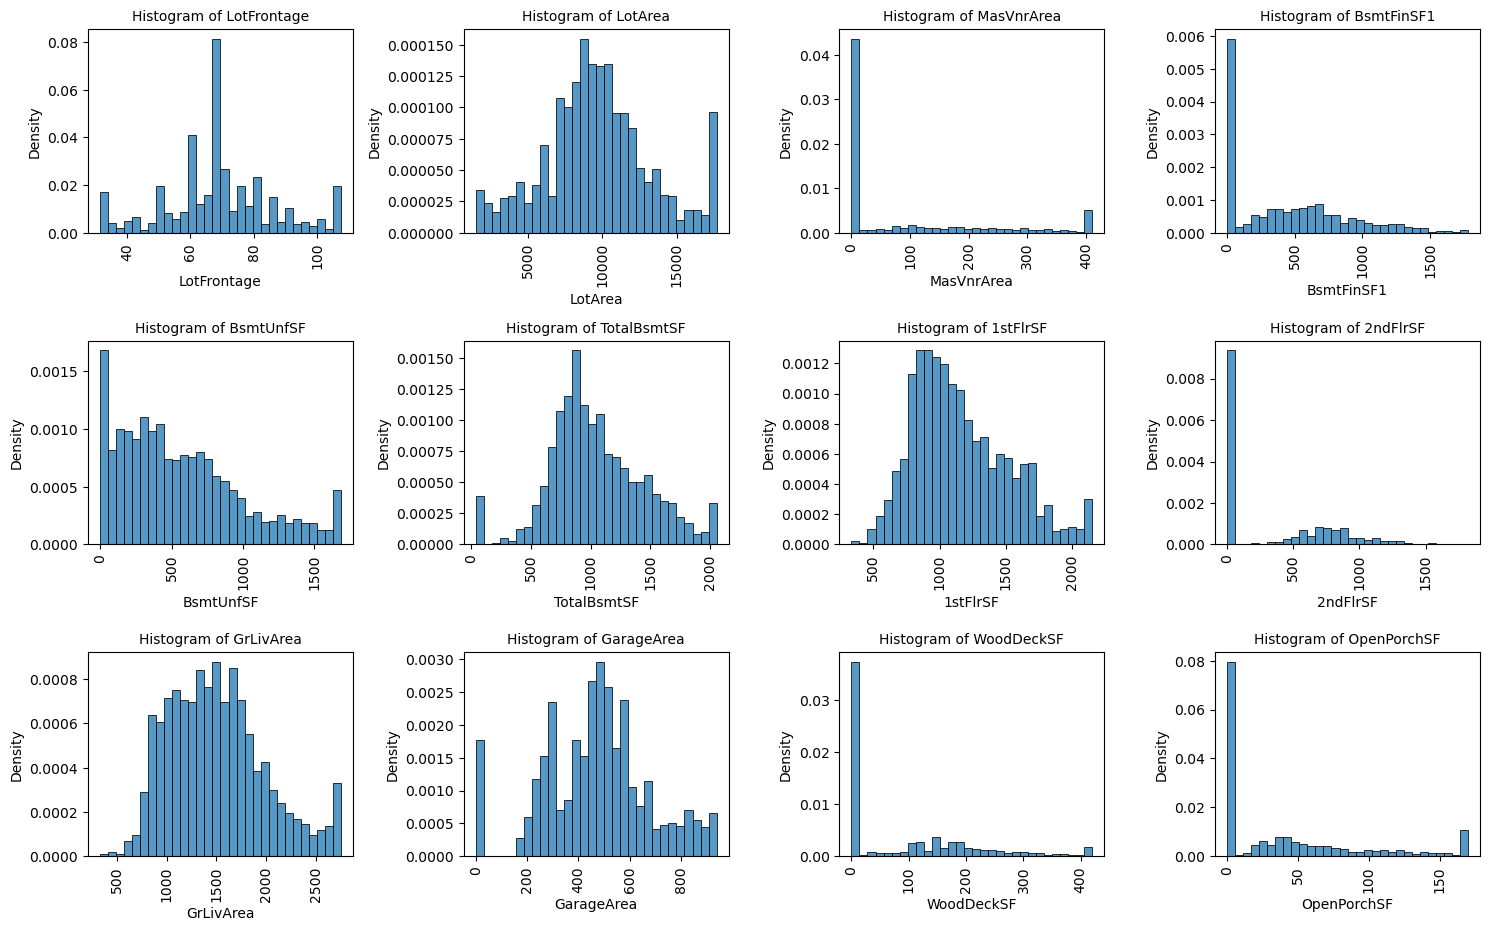

In [49]:
features_to_visualize = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
plot_histograms(df, cont_table, features_to_visualize, rows=5, cols=4)

After transforming, the distributions of these features look much less skewed.

### 2.4. Encoding

In [50]:
cat_summary(df[categorical_features])

,Feature,Count,Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,MSZoning,1460,0.0,5,RL,1151,78.835616,RM,218,14.931507
1,Street,1460,0.0,2,Pave,1454,99.589041,Grvl,6,0.410959
2,LotShape,1460,0.0,4,Reg,925,63.356164,IR1,484,33.150685
3,LandContour,1460,0.0,4,Lvl,1311,89.794521,Bnk,63,4.315068
4,Utilities,1460,0.0,2,AllPub,1459,99.931507,NoSeWa,1,0.068493
5,LotConfig,1460,0.0,5,Inside,1052,72.054795,Corner,263,18.013699
6,LandSlope,1460,0.0,3,Gtl,1382,94.657534,Mod,65,4.452055
7,Neighborhood,1460,0.0,25,NAmes,225,15.410959,CollgCr,150,10.273973
8,Condition1,1460,0.0,9,Norm,1260,86.30137,Feedr,81,5.547945
9,Condition2,1460,0.0,8,Norm,1445,98.972603,Feedr,6,0.410959


By investigating the data description, among the categorical features, the following are ordinal (there is an intrinsic order or ranking):
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageQual
- GarageCond
The other features are nominal (there is no intrinsic order).

In [51]:
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']
nominal_features = [f for f in categorical_features if f not in ordinal_features]
# create a copy of the original DataFrame
df_encoded = df.copy()

We first encode ordinal features using ordinal encoding.

In [52]:
# for each ordinal feature, print the unique values
for feature in ordinal_features:
    print(f'{feature}: {df_encoded[feature].unique()}')

ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual: ['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
BsmtCond: ['TA' 'Gd' 'No Basement' 'Fa' 'Po']
BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'No Basement']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu: ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual: ['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']
GarageCond: ['TA' 'Fa' 'No Garage' 'Gd' 'Po' 'Ex']


In [53]:
# create dictionary mapping ordinal values to numeric values
ordinal_mapping = {
    'ExterQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtExposure': {'No Basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'No Basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'KitchenQual': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'FireplaceQu': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageQual': {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'No Garage': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
}
for feature in ordinal_features:
    df_encoded[feature] = df_encoded[feature].map(ordinal_mapping[feature])

For the other variables, we perform one-hot encoding.

In [54]:
# perform one-hot encoding for nominal_features and drop the original features
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, drop_first=True)

Verify all features now have numeric values

In [55]:
df_encoded.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,HasBsmtFinSF2,HasLowQualFinSF,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,HasPoolArea,HasMiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,65.0,8450.0,7,5,2003,2003,196.0,3,2,4,3,1,6,706.0,1,150.0,856.0,4,856.0,854.0,1710.0,1,0,2,1,3,1,3,8,0,0,2003.0,2,548.0,3,3,0.0,61.0,2,2008,208500,0,0,0,0,0,0,0,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,Fals

### 2.5. Normalization and Scaling

We perform range normalization to transform all values to the range [0, 1]. This will help certain machine learning models which are sensitive to the range of the input.

In [56]:
# perform range normalization to [0, 1] for df_encoded (except the Id column), assuming that all features are continuous
scaler = MinMaxScaler()
scaled_numeric_features = scaler.fit_transform(df_encoded.drop(['Id'], axis=1))
df_encoded = pd.DataFrame(scaled_numeric_features, columns=df_encoded.columns[1:])
df_encoded.insert(0, 'Id', df['Id'])
df_encoded.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,HasBsmtFinSF2,HasLowQualFinSF,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,HasPoolArea,HasMiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,0.440789,0.430367,0.666667,0.500,0.949275,0.883333,0.477321,0.666667,0.5,0.8,0.75,0.25,1.000000,0.396490,0.166667,0.088994,0.404975,1.00,0.286636,0.469231,0.570097,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,0.000000,0.0,0.996517,0.50,0.584066,0.6,0.6,0.000000,0.358824,0.090909,0.50,0.241078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### 2.6. Drop duplicates

In [57]:
# find duplicates in df_encoded
duplicated_rows = df_encoded[df_encoded.duplicated()]
duplicated_rows

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,HasBsmtFinSF2,HasLowQualFinSF,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,HasPoolArea,HasMiscVal,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190


### 2.6. Save the preprocessed data
Before doing colinearity analysis and feature selection, we save the preprocessed data to csv files. We save two versions of the data, `df` which is the preprocessed data without feature encoding, and `df_encoded` which is the preprocessed data after feature encoding and normalization. The preprocessing includes:
- Handle missing values
- Handle irregular cardinality
- Handle outliers

In [58]:
df.to_csv('house-price-train-cleaned.csv', index=False)
df_encoded.to_csv('house-price-train-cleaned-encoded.csv', index=False)

## Part 3: Collinearity analysis and Feature Selection

### 3.1. For continuous features

#### 3.1.1. Correlation matrix

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

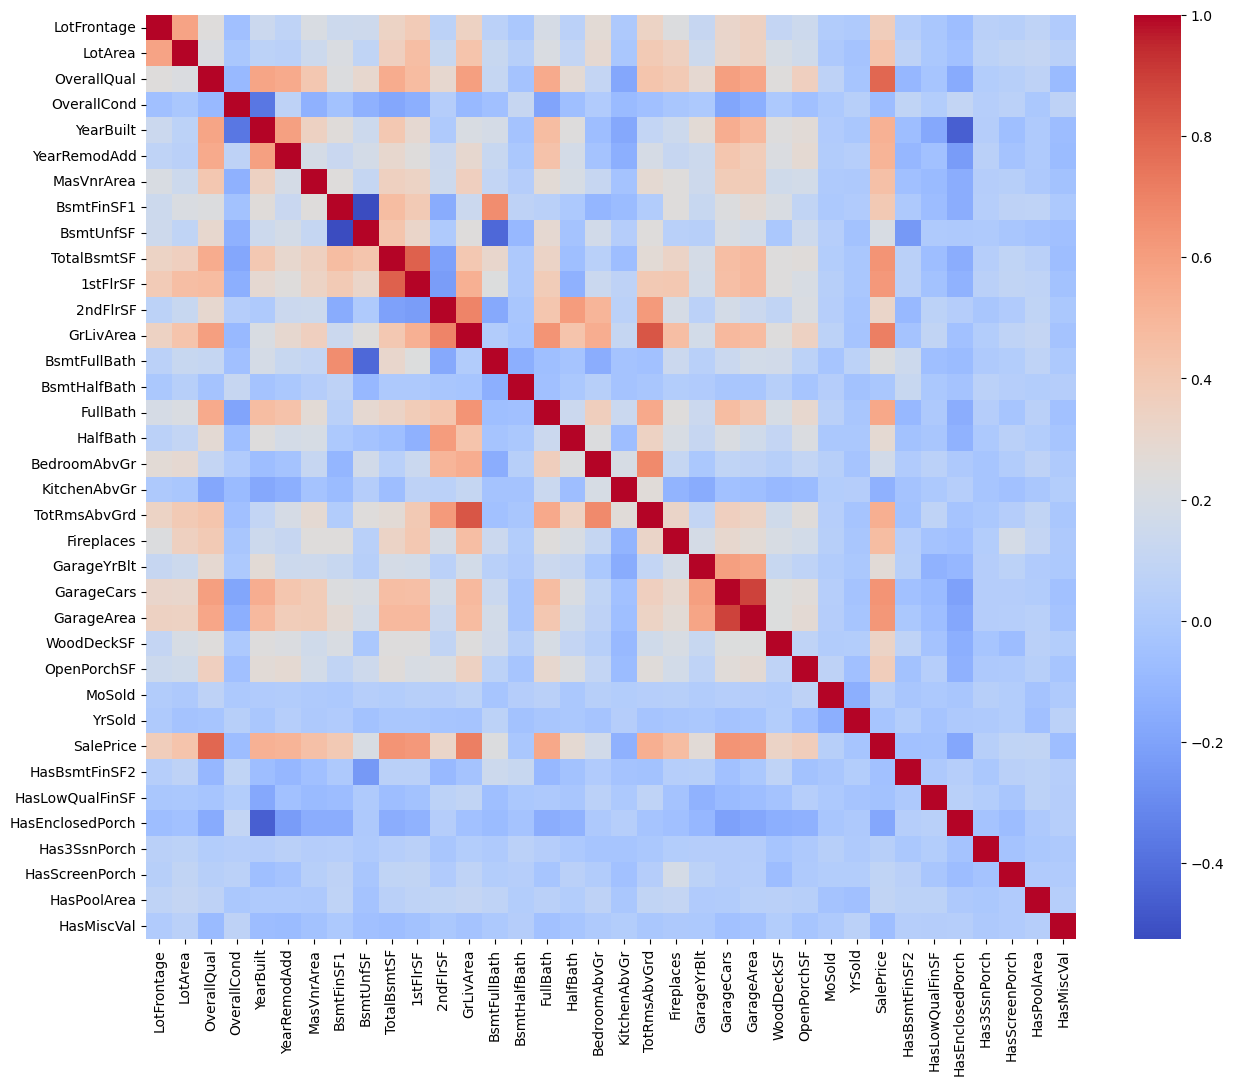

In [60]:
correlation_matrix = df_encoded[continuous_features].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.show()

In [61]:
# detect highly correlated features (|correlation coefficient| > 0.8)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            correlated_features.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))
correlated_features

{('1stFlrSF', 'TotalBsmtSF'),
 ('GarageArea', 'GarageCars'),
 ('TotRmsAbvGrd', 'GrLivArea')}

From the calculation, we know that the following pairs of features are highly correlated:
- First Floor square feet (1stFlrSF) and Total square feet of basement area (TotalBsmtSF)
- Size of garage in square feet (GarageArea) and Size of garage in car capacity (GarageCars)
- Total rooms above grade (does not include bathrooms) (TotRmsAbvGrd) and Above grade (ground) living area square feet (TotRmsAbvGrd)
From domain knowledge, it is expected that that these features have high correlations. We decided to drop `TotalBsmtSF`, `GarageCars`, and `TotRmsAbvGrd`, and keep the other features.

In [62]:
features_to_dropped = ['TotalBsmtSF', 'GarageCars', 'TotRmsAbvGrd']
df_encoded.drop(features_to_dropped, axis=1, inplace=True)
continuous_features = [feature for feature in continuous_features if feature not in features_to_dropped]

Verify that no correlation value outside the diagonal is > 0.8

In [63]:
correlation_matrix = df_encoded[continuous_features].corr()
correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().gt(0.8).sum()

0

#### 3.1.2. Variance Inflation Factor (VIF)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(data):
    X = add_constant(data)

    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns

    # Calculating VIF for each feature
    vif_data["VIF"] = [round(variance_inflation_factor(X.values, i), 2) for i in range(len(X.columns))]

    return vif_data
    
compute_vif(df_encoded[continuous_features])

,Feature,VIF
0,const,155.94
1,LotFrontage,1.68
2,LotArea,1.99
3,OverallQual,3.72
4,OverallCond,1.62
5,YearBuilt,4.43
6,YearRemodAdd,2.30
7,MasVnrArea,1.42
8,BsmtFinSF1,4.66
9,BsmtUnfSF,3.71


`1stFlrSF`, `2ndFlrSF`, and `GrLivArea` have VIF values above then, which suggest potential potential multicolinearity between them and others. From domain knowledge, it is expected that there is a relation ship between First Floor square feet (1stFlrSF), Second floor square feet (2ndFlrSF), and Above grade (ground) living area square feet (GrLivArea). We will try removing `GrLivArea` to see how it affects the VIT values of others.

In [65]:
# try removing GrLivArea to see how it affects the VIT values of others.
compute_vif(df_encoded[[f for f in continuous_features if f != 'GrLivArea']])

,Feature,VIF
0,const,155.55
1,LotFrontage,1.67
2,LotArea,1.99
3,OverallQual,3.69
4,OverallCond,1.62
5,YearBuilt,4.43
6,YearRemodAdd,2.30
7,MasVnrArea,1.42
8,BsmtFinSF1,4.66
9,BsmtUnfSF,3.71


After removing `GrLivArea`, all VIF values are now below 10. Therefore, we decided to drop `GrLivArea` from the data.

In [66]:
features_to_dropped = ['GrLivArea']
df_encoded.drop(features_to_dropped, axis=1, inplace=True)
continuous_features = [feature for feature in continuous_features if feature not in features_to_dropped]

### 3.2. For categorical features

#### 3.2.1. Correlation matrix of one-hot encoded categorical features

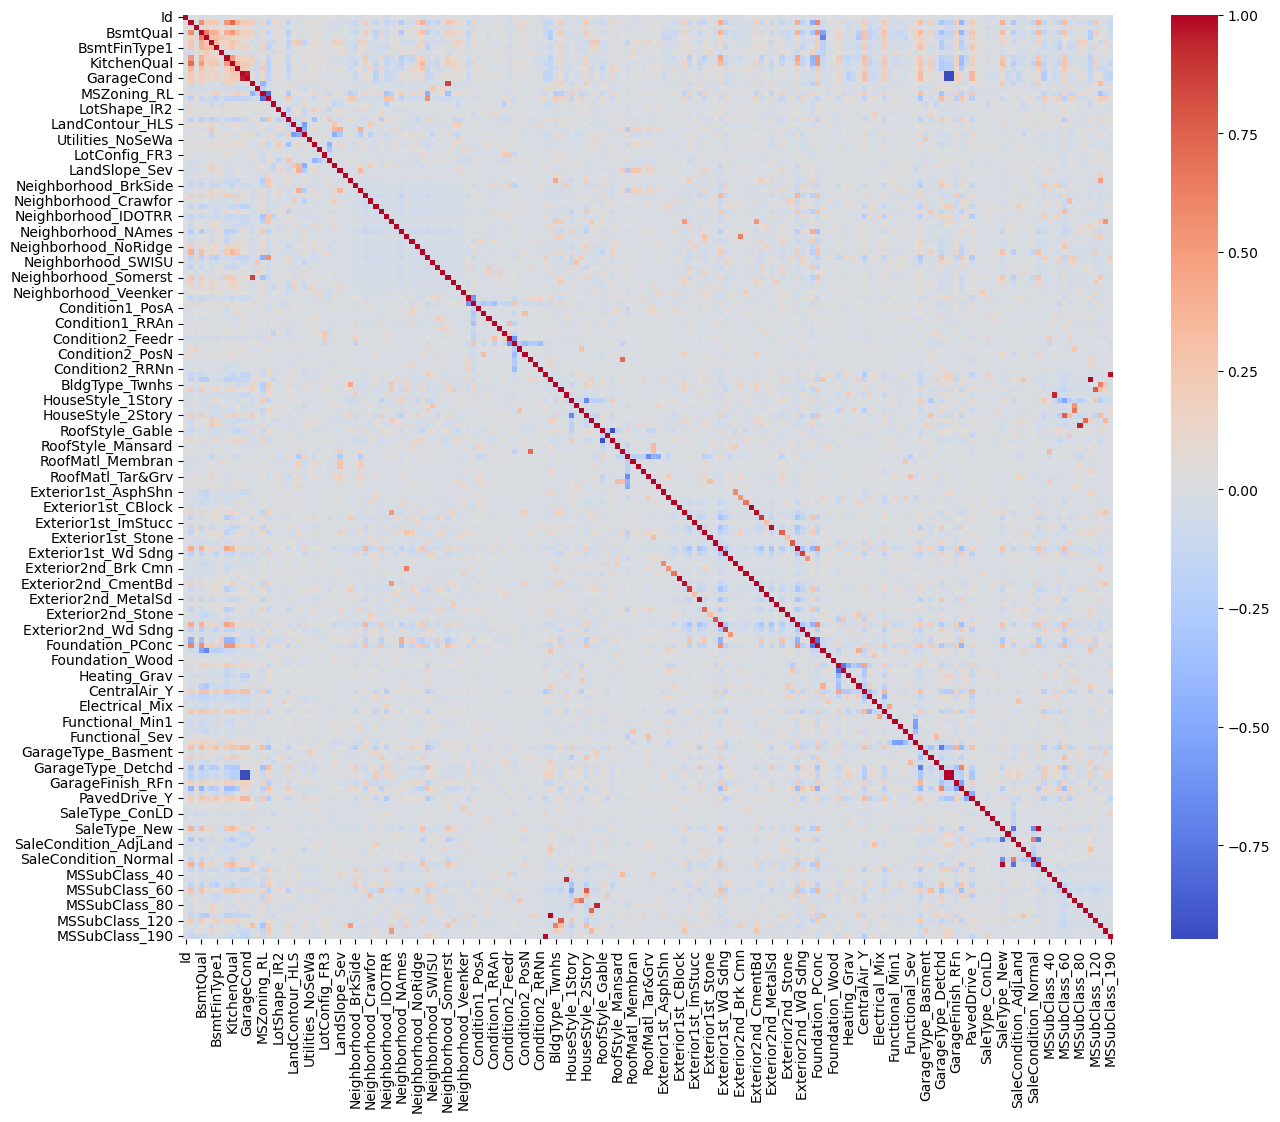

In [67]:
cat_features_encoded = [f for f in df_encoded.columns if f not in continuous_features]
correlation_matrix = df_encoded[cat_features_encoded].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.show()

In [68]:
# detect highly correlated features (|correlation coefficient| > 0.8)
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            correlated_features.add((correlation_matrix.columns[i], correlation_matrix.columns[j]))
correlated_features

{('Exterior2nd_CBlock', 'Exterior1st_CBlock'),
 ('Exterior2nd_CmentBd', 'Exterior1st_CemntBd'),
 ('Exterior2nd_HdBoard', 'Exterior1st_HdBoard'),
 ('Exterior2nd_MetalSd', 'Exterior1st_MetalSd'),
 ('Exterior2nd_VinylSd', 'Exterior1st_VinylSd'),
 ('Exterior2nd_Wd Sdng', 'Exterior1st_Wd Sdng'),
 ('GarageCond', 'GarageQual'),
 ('GarageFinish_No Garage', 'GarageCond'),
 ('GarageFinish_No Garage', 'GarageQual'),
 ('GarageFinish_No Garage', 'GarageType_No Garage'),
 ('GarageType_No Garage', 'GarageCond'),
 ('GarageType_No Garage', 'GarageQual'),
 ('MSSubClass_190', 'BldgType_2fmCon'),
 ('MSSubClass_45', 'HouseStyle_1.5Unf'),
 ('MSSubClass_80', 'HouseStyle_SLvl'),
 ('MSSubClass_90', 'BldgType_Duplex'),
 ('MSZoning_RM', 'MSZoning_RL'),
 ('Neighborhood_Somerst', 'MSZoning_FV'),
 ('RoofStyle_Hip', 'RoofStyle_Gable'),
 ('SaleCondition_Partial', 'SaleType_New')}

By analyzing the correlation values, we sptted that the following pairs of features are highly correlated:
- `Exterior2nd` and `Exterior1st`. This makes sense because both features refer to exterior of the house.
- `GarageFinish`, `GarageCond`, `GarageQual`, `GarageType`. This makes sense because all these features refer to different properties of the garage.
- `MSSubClass`, `BldgType`, and `HouseStyle`. This makes sense because all these features refer to the type of dwelling of the house.
We decided to drop `Exterior2nd`, `GarageFinish`, `GarageQual`, `GarageType`, `MSSubClass`, and `BldgType`, and keep the other features.

In [69]:
# drop features that start with 'Exterior2nd'
features_to_dropped = [f for f in df_encoded.columns if f.startswith('Exterior2nd')]
df_encoded.drop(features_to_dropped, axis=1, inplace=True)

In [70]:
# drop features that start with 'GarageFinish'
features_to_dropped = [f for f in df_encoded.columns if f.startswith('GarageFinish')]
df_encoded.drop(features_to_dropped, axis=1, inplace=True)

In [71]:
# drop features that start with 'GarageType'
features_to_dropped = [f for f in df_encoded.columns if f.startswith('GarageType')]
df_encoded.drop(features_to_dropped, axis=1, inplace=True)

In [72]:
# drop features that start with 'MSSubClass'
features_to_dropped = [f for f in df_encoded.columns if f.startswith('MSSubClass')]
df_encoded.drop(features_to_dropped, axis=1, inplace=True)

In [73]:
# drop features that start with 'BldgType'
features_to_dropped = [f for f in df_encoded.columns if f.startswith('BldgType')]
df_encoded.drop(features_to_dropped, axis=1, inplace=True)

In [74]:
# drop GarageQual
df_encoded.drop('GarageQual', axis=1, inplace=True)

### 3.3. Save the final data to file

In [75]:
df_encoded.to_csv('house-price-train-cleaned-encoded-feature-selected.csv', index=False)